In [2]:
import numpy as np
from gensim.models import KeyedVectors
# https://github.com/sdadas/polish-nlp-resources?tab=readme-ov-file#fasttext
fasttext_model = KeyedVectors.load("fasttext_100_3_polish.bin")

In [6]:
fasttext_model.wv.get_vector('office', norm=True)

array([-0.10575686,  0.00275842, -0.15149923,  0.04684225, -0.09484185,
        0.27445596, -0.13551135, -0.08899829, -0.16027121,  0.0851451 ,
        0.18053234, -0.0375574 ,  0.08118784, -0.03693336,  0.13899295,
        0.0148702 , -0.03542297,  0.07549705, -0.06520785, -0.09142417,
       -0.00903711,  0.15116395, -0.100382  ,  0.0491643 ,  0.00223149,
       -0.06079744,  0.0959003 , -0.12254302, -0.06442568, -0.01175186,
        0.14357556,  0.082293  , -0.00633075,  0.12356292, -0.12873764,
        0.03582585,  0.00486956,  0.02265417,  0.09742602,  0.00961361,
       -0.07241934,  0.05235291, -0.15645239,  0.05410094, -0.03922489,
       -0.19014828,  0.05091096, -0.16526255, -0.04351336,  0.02157344,
       -0.15707618, -0.01369421,  0.05524002, -0.12716308,  0.10982089,
        0.11500968,  0.00536837,  0.16475938, -0.13811931, -0.02000868,
        0.06066024, -0.03149116, -0.12379967, -0.21108894,  0.07293601,
       -0.14373247, -0.10874739, -0.03041346,  0.24131383,  0.06

In [8]:
fasttext_model.wv.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])

0.72575206

In [60]:
import string
import numpy as np
def get_document_vector(document_string):
    processed = document_string.translate(str.maketrans('', '', string.punctuation)).split()
    try:
        processed = np.array(fasttext_model.wv.get_sentence_vector(processed))
        return processed
    except ValueError:
        return np.NAN

In [61]:
get_document_vector("This, is - a test.")

array([ 0.01578879, -0.0966718 , -0.12096456,  0.03103824,  0.11989886,
        0.08134278, -0.02491791, -0.04889391, -0.05900102,  0.05264781,
        0.07366802,  0.05264994,  0.03538202,  0.03959122,  0.08029908,
       -0.05133899, -0.00391489,  0.05500277,  0.02347905,  0.08629225,
       -0.08096454,  0.033292  , -0.07492353,  0.03558746, -0.03898185,
        0.01894082, -0.00977144, -0.02125431, -0.09896845, -0.07426734,
        0.07132851,  0.05021148,  0.06596912, -0.02060991, -0.06927098,
       -0.0590184 ,  0.03158417, -0.00033762,  0.18291356,  0.02761706,
       -0.0305428 , -0.07682855, -0.0167096 ,  0.02518708, -0.01596445,
       -0.0379869 ,  0.02503271, -0.10872342, -0.0715234 , -0.10176589,
       -0.03008098, -0.1061382 ,  0.04008991, -0.01109458,  0.01513245,
        0.00942784,  0.00155242,  0.05995774, -0.11261091, -0.06303023,
        0.02372515,  0.00859607, -0.02200282,  0.02862521, -0.091718  ,
        0.01269631, -0.02191854, -0.09026017,  0.03745283, -0.00

In [62]:
import pandas as pd

training_file = pd.read_csv("train/train.tsv", sep='\t', on_bad_lines="warn", names=["class","text_data"])
training_file.head()

C:\Users\Adrian\AppData\Local\Temp\ipykernel_1428\2569974358.py:3: ParserWarning: Skipping line 25706: expected 2 fields, saw 3
Skipping line 58881: expected 2 fields, saw 3
Skipping line 73761: expected 2 fields, saw 3

  training_file = pd.read_csv("train/train.tsv", sep='\t', on_bad_lines="warn", names=["class","text_data"])


class                                          text_data
0      1  Mindaugas Budzinauskas wierzy w odbudowę formy...
1      1  Przyjmujący reprezentacji Polski wrócił do PGE...
2      0  FEN 9: Zapowiedź walki Róża Gumienna vs Katarz...
3      1  Aleksander Filipiak: Czuję się dobrze w nowym ...
4      0  Victoria Carl i Aleksiej Czerwotkin mistrzami ...

In [63]:
training_file["text_data"].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))

0        Mindaugas Budzinauskas wierzy w odbudowę formy...
1        Przyjmujący reprezentacji Polski wrócił do PGE...
2        FEN 9 Zapowiedź walki Róża Gumienna vs Katarzy...
3        Aleksander Filipiak Czuję się dobrze w nowym k...
4        Victoria Carl i Aleksiej Czerwotkin mistrzami ...
                               ...                        
98124    Kamil Syprzak zaczyna kolekcjonować trofea FC ...
98125    Holandia dwa gole Piotra Parzyszka Piotr Parzy...
98126    Sparingowo Korona gorsza od Stali Lettieri spr...
98127    Vive  Wisła Ośmiu debiutantów w tegorocznej św...
98128    WTA Miami Timea Bacsinszky pokonana Swietłana ...
Name: text_data, Length: 98129, dtype: object

In [64]:
training_file.dropna(inplace=True)

In [65]:
len(training_file.index)

98129

In [66]:
training_file["vectorized"] = training_file["text_data"].apply(get_document_vector)

In [67]:
training_file.dropna(inplace=True)
print(len(training_file.index))

98128


In [68]:
training_file.head()

class                                          text_data  \
0      1  Mindaugas Budzinauskas wierzy w odbudowę formy...   
1      1  Przyjmujący reprezentacji Polski wrócił do PGE...   
2      0  FEN 9: Zapowiedź walki Róża Gumienna vs Katarz...   
3      1  Aleksander Filipiak: Czuję się dobrze w nowym ...   
4      0  Victoria Carl i Aleksiej Czerwotkin mistrzami ...   

                                          vectorized  
0  [-0.010491192, -0.058443062, -0.1072605, 0.068...  
1  [0.019159772, -0.03807462, -0.093816765, 0.080...  
2  [0.019561907, -0.09903135, -0.08141139, 0.0962...  
3  [0.0019692876, -0.040995505, -0.112910554, 0.0...  
4  [0.026810315, -0.07052034, -0.12447791, 0.0609...

In [69]:
training_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98128 entries, 0 to 98128
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       98128 non-null  int64 
 1   text_data   98128 non-null  object
 2   vectorized  98128 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [70]:
training_file["vectorized"].iloc[0]

array([-0.01049119, -0.05844306, -0.1072605 ,  0.0680153 ,  0.01738467,
        0.02759303,  0.02690293, -0.02688588, -0.00051565,  0.04960843,
        0.0267325 , -0.07590238, -0.00112739, -0.02663443, -0.01215785,
       -0.02335822,  0.00596362,  0.03255358,  0.03372947, -0.0320864 ,
        0.06242761,  0.05441704, -0.10440411,  0.02391675, -0.02517564,
       -0.00581436,  0.01041707, -0.02866426, -0.07569201, -0.05691882,
        0.01377875,  0.05586738,  0.02601947, -0.01073826, -0.07011177,
        0.05394488,  0.00468541, -0.0290179 ,  0.12888645,  0.05720428,
       -0.04035591, -0.05646745, -0.00185273,  0.01846331,  0.02260421,
       -0.05327827, -0.0299728 , -0.01459699, -0.01037856, -0.05196216,
       -0.02092045, -0.00421424, -0.0101665 , -0.01815657,  0.03365456,
        0.01784232, -0.01427742, -0.05149295, -0.01840808,  0.08991119,
        0.03609616, -0.03085677, -0.02868558,  0.0879923 , -0.08462378,
       -0.02428374, -0.06649223,  0.05328292,  0.09114845, -0.00

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam

def create_model():
    inputs = keras.Input(shape=(100,))
    dense = layers.Dense(64, activation="relu")(inputs)
    output = layers.Dense(1, activation="sigmoid")(dense)
    model = keras.Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [113]:
from sklearn.model_selection import train_test_split

training_file = training_file.sample(frac=1).reset_index(drop=True)
train, valid = train_test_split(training_file, test_size=0.2)
train_x = np.stack(train["vectorized"].values)
train_y = np.stack(train["class"].values)
valid_x = np.stack(valid["vectorized"].values)
valid_y = np.stack(valid["class"].values)

In [114]:
print(train["vectorized"])

11925    [0.00907336, -0.035000063, -0.046387862, 0.107...
29681    [0.029005446, -0.062998086, -0.10763814, 0.059...
39659    [0.0073042903, -0.028519068, -0.07020145, 0.08...
26203    [-0.012138679, -0.036977977, -0.05332508, 0.05...
93611    [0.034259614, -0.06937863, -0.09370455, 0.0414...
                               ...                        
90557    [0.015421399, -0.051549092, -0.118074715, 0.07...
10805    [-0.017966524, -0.07279962, -0.10843535, 0.071...
17336    [0.038043424, -0.024239093, -0.11319029, 0.066...
39497    [0.03166563, -0.061132513, -0.09316901, 0.1028...
87005    [0.02179843, -0.042094912, -0.078197055, 0.084...
Name: vectorized, Length: 78502, dtype: object


In [115]:
train.head()

class                                          text_data  \
11925      1  Tam było czuć historię. Leo Beenhakker zaurocz...   
29681      1  Filip Dylewicz: Po raz pierwszy od 20 lat prow...   
39659      1  Czytaj w "PN". Finaliści MŚ. Piękno i rygor Hi...   
26203      1  Novak Djoković podał do sądu władze miasta Rio...   
93611      1  Wimbledon: Jelena Ostapenko nie stawiła oporu ...   

                                              vectorized  
11925  [0.00907336, -0.035000063, -0.046387862, 0.107...  
29681  [0.029005446, -0.062998086, -0.10763814, 0.059...  
39659  [0.0073042903, -0.028519068, -0.07020145, 0.08...  
26203  [-0.012138679, -0.036977977, -0.05332508, 0.05...  
93611  [0.034259614, -0.06937863, -0.09370455, 0.0414...

In [116]:
print(len(train.index))

78502


In [117]:
valid.head()

class                                          text_data  \
87636      1  Szok w Hali Mistrzów, Energa Czarni w półfinal...   
96088      1  Postępy Kuby Błaszczykowskiego Jakub Błaszczyk...   
54386      1  Pobici piłkarze odchodzą ze Sportingu Lizbona....   
29418      1  El. LE: polskie kluby znają potencjalnych rywa...   
80561      1  Było ofensywnie i efektownie. Polpharma Starog...   

                                              vectorized  
87636  [0.0040451484, -0.034110088, -0.1111216, 0.050...  
96088  [0.01574161, -0.055649985, -0.077657014, 0.085...  
54386  [-0.013020566, -0.076468304, -0.127176, 0.0720...  
29418  [-0.005546203, -0.033757057, -0.10181239, 0.07...  
80561  [0.021034276, -0.06635279, -0.091047965, 0.054...

In [118]:
print(len(valid.index))

19626


In [119]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
model = create_model()
history = model.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=20, callbacks=[callback])

Epoch 1/20
2454/2454 [==============================] - 3s 1ms/step - loss: 0.3017 - accuracy: 0.8763 - val_loss: 0.2039 - val_accuracy: 0.9214
Epoch 2/20
2454/2454 [==============================] - 2s 946us/step - loss: 0.1920 - accuracy: 0.9256 - val_loss: 0.1896 - val_accuracy: 0.9268
Epoch 3/20
2454/2454 [==============================] - 2s 989us/step - loss: 0.1837 - accuracy: 0.9285 - val_loss: 0.1848 - val_accuracy: 0.9287
Epoch 4/20
2454/2454 [==============================] - 2s 954us/step - loss: 0.1795 - accuracy: 0.9298 - val_loss: 0.1820 - val_accuracy: 0.9301
Epoch 5/20
2454/2454 [==============================] - 3s 1ms/step - loss: 0.1768 - accuracy: 0.9308 - val_loss: 0.1804 - val_accuracy: 0.9304
Epoch 6/20
2454/2454 [==============================] - 3s 1ms/step - loss: 0.1733 - accuracy: 0.9320 - val_loss: 0.1756 - val_accuracy: 0.9324
Epoch 7/20
2454/2454 [==============================] - 2s 982us/step - loss: 0.1692 - accuracy: 0.9336 - val_loss: 0.1721 - val_a

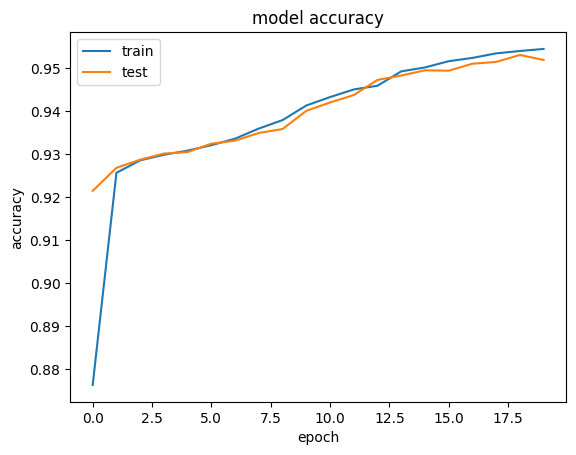

In [120]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

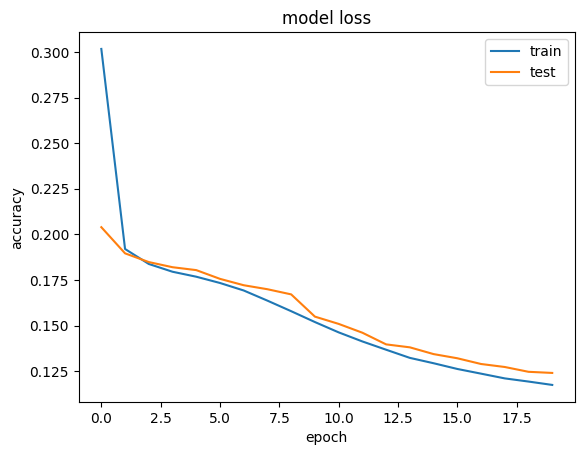

In [121]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [138]:
def process_input(directory):
    with open(directory+"/in.tsv", encoding="utf-8") as data_file:
        df = pd.DataFrame([], columns=['text_data'])
        for line in data_file:
            df = df._append({'text_data': line}, ignore_index=True)
    df["text_data"].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
    df["vectorized"] = df["text_data"].apply(get_document_vector)
    data_x = np.stack(df["vectorized"].values)
    predictions = model.predict(data_x)
    return predictions

predictions = process_input("dev-0")[:,0]

171/171 [==============================] - 0s 591us/step


In [139]:
predictions

array([9.9900788e-01, 9.9998349e-01, 2.1855670e-03, ..., 2.0675772e-04,
       9.9930727e-01, 9.8721308e-01], dtype=float32)

In [142]:
print(np.rint(predictions)[:100])

[1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1.]


In [144]:
predictions_rounded = np.rint(predictions)

In [148]:
np.savetxt("dev-0/out.tsv",predictions_rounded, fmt='%i')

In [149]:
predictions = process_input("test-A")[:,0]

171/171 [==============================] - 0s 619us/step


In [150]:
predictions_rounded = np.rint(predictions)

In [151]:
np.savetxt("test-A/out.tsv",predictions_rounded, fmt='%i')

In [152]:
model.save("model.keras")